In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import mlflow
from pycaret.classification import *
from pycaret.datasets import get_data

In [3]:
def DecisionTree(X_train,X_test,y_train,y_test):

    tree=DecisionTreeClassifier(criterion='gini',min_samples_split=20,random_state=99)
    tree.fit(X_train,y_train)
    predictions=tree.predict(X_test)
    plot_confusion_matrix(tree,X_test,y_test,display_labels=['No falla', 'Falla'],cmap='Blues')
    print(classification_report(y_test, predictions))


In [22]:
def RandomForest(X_train,X_test,y_train,y_test):
    #Build SRF model
    SRF = RandomForestClassifier(n_estimators=2, random_state=0)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate SRF model
    scores = cross_validate(SRF, X_train, y_train, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))
    SRF.fit(X_train, y_train)
    #SRF prediction result
    y_pred = SRF.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('Standard Random Forest Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))
    print("Precision",precision_score(y_test,y_pred))
    print("Acc:",accuracy_score(y_test,y_pred))  
    print("Recall:",recall_score(y_test, y_pred, average='weighted'))
    print("f1 score:",f1_score(y_test, y_pred, average='weighted'))

In [15]:
def RandomForestBalanced(X_train,X_test,y_train,y_test):
        #Build SRF model
    BRFC = BalancedRandomForestClassifier(n_estimators=2, random_state=2)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate BRFC model
    scores = cross_validate(BRFC, X_train, y_train, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))

    #Train BRFC
    BRFC.fit(X_train, y_train)
    #BRFC prediction result
    y_pred = BRFC.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(BRFC, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('Balanced Random Forest Confusion Matrix')
    plt.show()

In [19]:
def RandomForestOversampling(X_train,X_test,y_train,y_test):
        #Use SMOTE to oversample the minority class
    oversample = SMOTE()
    over_X, over_y = oversample.fit_resample(X_train, y_train)
    over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
    #Build SMOTE SRF model
    SMOTE_SRF = RandomForestClassifier(n_estimators=2, random_state=0)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate SMOTE SRF model
    scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))

    #Randomly spilt dataset to test and train set
    #Train SMOTE SRF
    SMOTE_SRF.fit(over_X_train, over_y_train)
    #SMOTE SRF prediction result
    y_pred = SMOTE_SRF.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('SMOTE + Standard Random Forest Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))

In [16]:
def RandomForestUndersampling(X_train,X_test,y_train,y_test):
    
    rus=RandomUnderSampler(sampling_strategy=1)
    #ax=y_res.value_counts()#.plot.pie(autopct='%.2f')
    #_=ax.set_title("Under-samplig")
    Under_X, Under_y = rus.fit_resample(X_train, y_train)
    Under_X_train, Under_X_test, Under_y_train, Under_y_test = train_test_split(Under_X, Under_y, test_size=0.1, stratify=Under_y)
    #Build SMOTE SRF model
    SMOTE_SRF = RandomForestClassifier(n_estimators=2, random_state=0)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate SMOTE SRF model
    scores = cross_validate(SMOTE_SRF, Under_X, Under_y, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))

    #Randomly spilt dataset to test and train set
    #Train SMOTE SRF
    SMOTE_SRF.fit(Under_X_train, Under_y_train)
    #SMOTE SRF prediction result
    y_pred = SMOTE_SRF.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('SMOTE + Standard Random Forest Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))

In [8]:
def split_df(df):
    features=df.iloc[:,:-1]
    target=df.iloc[:,-1]
    return features,target

In [9]:
df = pd.read_csv('datasetTRAIN.csv')
df_test=pd.read_csv('datasetTEST.csv')

In [10]:
x_=df.iloc[:,:-1]
y_=df.iloc[:,-1:]

In [11]:
y_.value_counts()#.plot.pie(autopct='%.2f')

y0 
0.0    686
1.0    288
dtype: int64

Dividir el conjunto de datos

In [12]:
X_train, X_val, y_train, y_val = train_test_split(x_, y_, test_size=0.2, random_state=10,stratify=y_)

In [13]:
#X_train,y_train=split_df(df)
X_test,y_test=split_df(df_test)

Dataset de Validacion

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       137
         1.0       0.97      0.97      0.97        58

    accuracy                           0.98       195
   macro avg       0.98      0.98      0.98       195
weighted avg       0.98      0.98      0.98       195



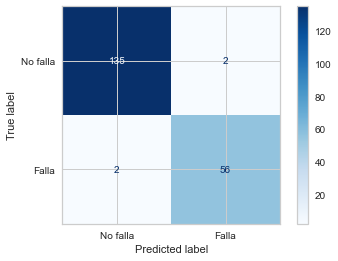

In [14]:
DecisionTree(X_train, X_val, y_train, y_val)

Mean f1: 0.975
Mean recall: 0.959
Mean precision: 0.993


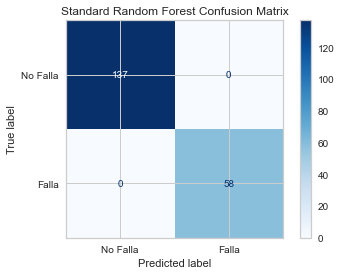

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       137
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Precision 1.0
Acc: 1.0
Recall: 1.0
f1 score: 1.0


In [26]:
RandomForest(X_train, X_val, y_train, y_val)

Mean f1: 0.998
Mean recall: 0.998
Mean precision: 0.998


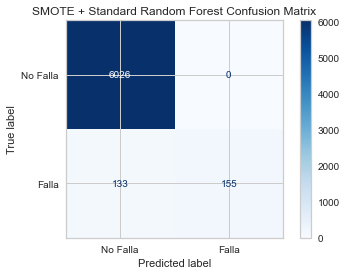

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6026
         1.0       1.00      0.54      0.70       288

    accuracy                           0.98      6314
   macro avg       0.99      0.77      0.84      6314
weighted avg       0.98      0.98      0.98      6314



In [17]:
RandomForestOversampling(X_train, X_test, y_train, y_test)

DataSet Test

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6026
         1.0       0.99      0.54      0.70       288

    accuracy                           0.98      6314
   macro avg       0.98      0.77      0.84      6314
weighted avg       0.98      0.98      0.98      6314



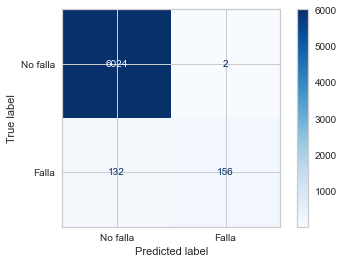

In [24]:
DecisionTree(X_train, X_test, y_train, y_test)

Mean f1: 0.975
Mean recall: 0.959
Mean precision: 0.993


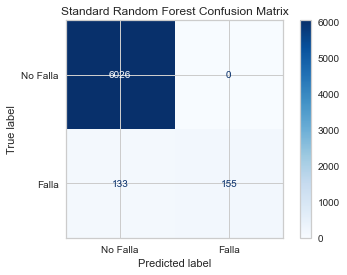

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      6026
         1.0       1.00      0.54      0.70       288

    accuracy                           0.98      6314
   macro avg       0.99      0.77      0.84      6314
weighted avg       0.98      0.98      0.98      6314

Precision 1.0
Acc: 0.9789356984478935
Recall: 0.9789356984478935
f1 score: 0.9758886348067829


In [23]:
RandomForest(X_train, X_test, y_train, y_test)

Mean f1: 0.949
Mean recall: 0.936
Mean precision: 0.965


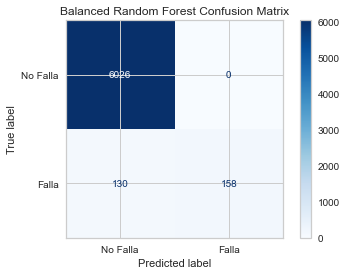

In [25]:
RandomForestBalanced(X_train, X_test, y_train, y_test)